## Лабораторная работа 1. Работа с изображениями

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
my_dpi = 96

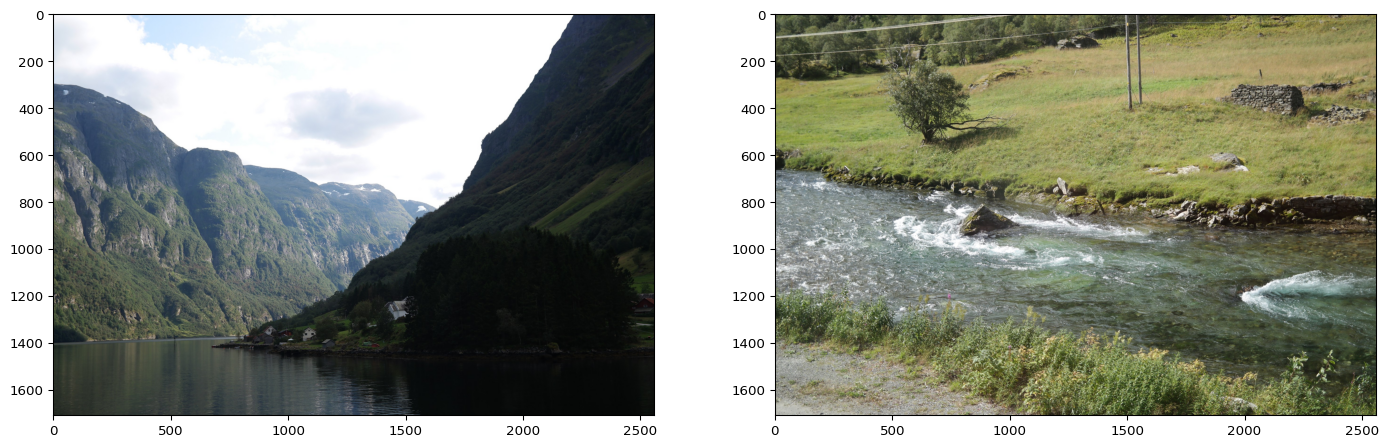

In [13]:
image1 = cv.cvtColor(cv.imread("pics/1.jpg"), cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(cv.imread("pics/2.jpg"), cv.COLOR_BGR2RGB)
(h1, w1, d1) = image1.shape
(h2, w2, d2) = image2.shape
fig, axs = plt.subplots(1, 2, figsize=(h1/my_dpi, w1/my_dpi), dpi=my_dpi)
axs[0].imshow(image1)
axs[1].imshow(image2)

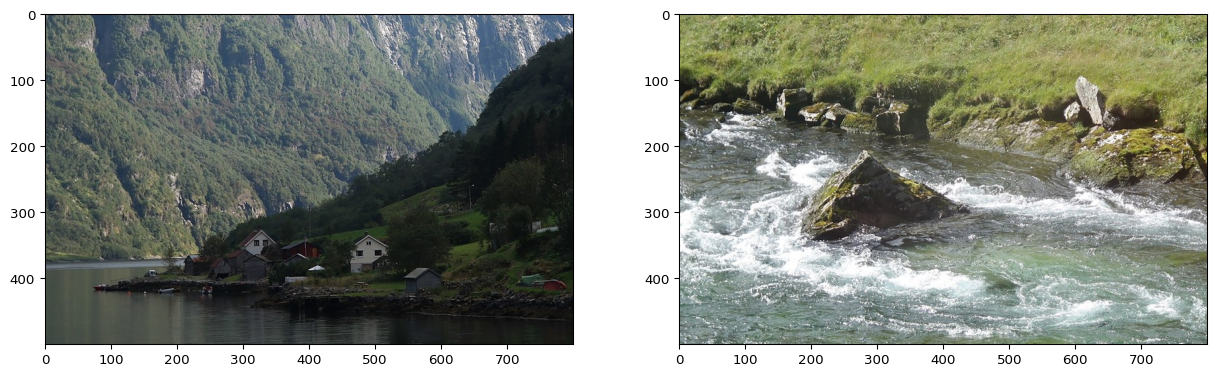

In [15]:
scale = 3
image1_frag = image1[1000:1500, 600: 1400]
image2_frag = image2[600:1100, 600:1400]
(h1, w1, d1) = image1_frag.shape
(h2, w2, d2) = image2_frag.shape
fig, axs = plt.subplots(1, 2, figsize=(scale*h1/my_dpi, scale*w1/my_dpi), dpi=my_dpi)
axs[0].imshow(image1_frag)
axs[1].imshow(image2_frag)

- Контрастирование
$$
I_{out} = \alpha \cdot I_{in} + \beta
$$

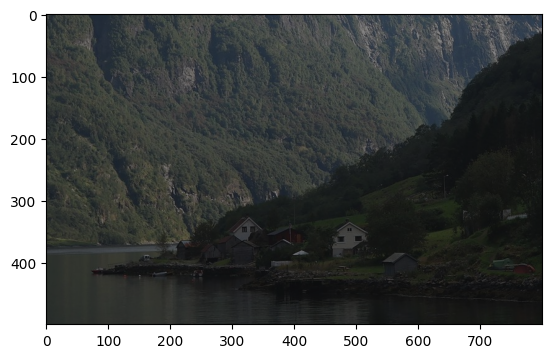

In [16]:
a = 0.5
b = 10
res1 = image1_frag.copy()
(h, w, d) = res1.shape
for i in range(h):
    for j in range(w):
        res1[i,j] = a * res1[i,j] + b

plt.imshow(res1)

- Наложение (бленд) изображений
$$
I_{out} = \alpha \cdot I_1 + \beta \cdot I_2
$$

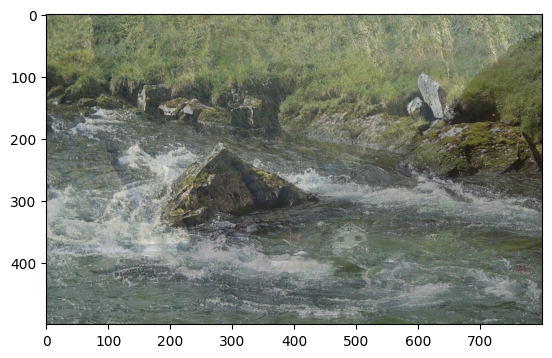

In [17]:
k1 = 0.4
k2 = 0.6

(h1, w1, d1) = image1_frag.shape
(h2, w2, d2) = image2_frag.shape
height = min(h1, w1)
width = min(w1, w2)
d = min(d1,d2)
res2 = np.zeros((height,width,d), np.uint8)

for i in range(height):
    for j in range(width):
        for k in range(d):
            blend = k1*image1_frag.item(i,j,k)+k2*image2_frag.item(i,j,k)
            res2.itemset((i,j,k),blend)

plt.imshow(res2)